In [159]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data viz library
import seaborn as sns #data viz library

In [160]:
df = pd.read_csv('Dataset/Dataset.csv')
print(df.shape)
df.head()

(200, 7)


,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [161]:
#find out more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [162]:
#a method to determine how many null values we have in a dataframe
df.isna().sum().sort_values(ascending = False)

Product       10
Total          6
OrderID        0
Date           0
CustomerID     0
Quantity       0
Price          0
dtype: int64

In [163]:
# See the rows with missing 'Product' or 'Total'
df[df['Product'].isnull() | df['Total'].isnull()]

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
6,7,2024-01-21,C017,NaN,1,1000,975.85
22,23,2024-10-03,C002,Laptop,1,1000,NaN
26,27,2024-09-09,C016,NaN,1,1000,1007.96
28,29,2024-12-10,C009,NaN,2,600,1218.60
35,36,2024-06-23,C003,NaN,1,600,591.78
57,58,2024-09-20,C001,NaN,1,600,612.47
62,63,2024-12-25,C009,NaN,2,1000,2108.75
70,71,2024-02-13,C001,NaN,1,100,96.85
108,109,2024-02-10,C019,Headphones,1,100,NaN
139,140,2024-12-17,C018,Phone,1,600,NaN


In [164]:
#Rplace missing data in Product with unknown
df['Product'].fillna('Unknown', inplace=True)

C:\Users\Fine\AppData\Local\Temp\ipykernel_1144\4230781139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna('Unknown', inplace=True)


In [165]:
#a method to determine how many null values we have in a data frame
df.isna().sum().sort_values(ascending = False)

Total         6
OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
dtype: int64

In [167]:
#To find the missing value in the Total (Multiple Quantity and Price)
missing_total_mask = df['Total'].isnull()
df.loc[missing_total_mask, 'Total'] = df.loc[missing_total_mask, 'Quantity'] * df.loc[missing_total_mask, 'Price']

In [168]:
#a method to determine how many null values we have in a data frame
df.isna().sum().sort_values(ascending = False)

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     200 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       200 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [170]:
df.head(20)

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
5,6,2024-07-07,C017,Laptop,2,1000,1882.00
6,7,2024-01-21,C017,Unknown,1,1000,975.85
7,8,2024-04-12,C002,Monitor,2,200,434.12
8,9,2024-05-01,C002,Phone,1,600,626.59
9,10,2024-08-02,C005,Phone,1,600,545.77


In [ ]:
#After the data clearnng
#Descriptive statistics of the dataset

In [171]:
grouped_df = df.groupby('Product')

In [172]:
grouped_df['Product'].count()

Product
Headphones     9
Laptop        76
Monitor       15
Phone         59
Tablet        31
Unknown       10
Name: Product, dtype: int64

In [174]:
grouped_df['Price'].mean()

Product
Headphones     100.0
Laptop        1000.0
Monitor        200.0
Phone          600.0
Tablet         400.0
Unknown        750.0
Name: Price, dtype: float64

In [182]:
#What is the total number of orders?
print('Total orders:', df['OrderID'].count())

Total orders: 200


In [183]:
#Sum of the Total
print('Total revenue:', df['Total'].sum())

Total revenue: 186601.90999999997


In [184]:
#To find all the descriptive statistics 
df.describe()

,OrderID,Quantity,Price,Total
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,1.36500,676.000000,933.009550
std,57.879185,0.61943,300.291316,647.446344
min,1.000000,1.00000,100.000000,93.310000
25%,50.750000,1.00000,400.000000,564.002500
50%,100.500000,1.00000,600.000000,838.350000
75%,150.250000,2.00000,1000.000000,1062.367500
max,200.000000,3.00000,1000.000000,3293.240000


In [179]:
#Which product category was sold the most (by quantity and revenue)?
Top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
Top_products

Product
Laptop        107
Phone          76
Tablet         42
Monitor        22
Unknown        14
Headphones     12
Name: Quantity, dtype: int64

In [180]:
Top_Product_by_Total = df.groupby('Product')['Total'].sum().sort_values(ascending=False)
Top_Product_by_Total

Product
Laptop        106405.98
Phone          46171.36
Tablet         17119.23
Unknown        11260.44
Monitor         4415.36
Headphones      1229.54
Name: Total, dtype: float64

In [195]:
#group by the CustomerID
grouped_df = df.groupby('CustomerID')

Customer_df = grouped_df['Quantity'].sum()
Customer_df = Customer_df.reset_index()
Customer_df.head()

,CustomerID,Quantity
0,C001,22
1,C002,17
2,C003,23
3,C004,14
4,C005,16


In [196]:
print('Min Customer amount: ', Customer_df['Quantity'].min())
print('Max Customer amount: ', Customer_df['Quantity'].max())

Min Customer amount:  7
Max Customer amount:  23


In [198]:
df.loc[(df.	CustomerID == 'C001'), ['OrderID', 'Quantity', 'Price', 'Total']]

,OrderID,Quantity,Price,Total
10,11,1,600,633.78
11,12,1,600,639.35
27,28,2,600,1185.30
41,42,1,400,399.63
46,47,3,1000,3124.19
57,58,1,600,612.47
70,71,1,100,96.85
90,91,1,1000,920.85
92,93,1,100,108.21
100,101,1,1000,945.48


In [208]:
#What was the best performing month in terms of total sales?
best_month = monthly_sales.idxmax(), monthly_sales.max()
best_month

(Timestamp('2024-12-31 00:00:00'), 21722.82)

In [210]:
#Which customers made the most purchases?
top_customers = df.groupby('CustomerID')['Quantity'].count().sort_values(ascending=False).head()
print(top_customers)

CustomerID
C001    17
C003    17
C016    16
C017    14
C020    14
Name: Quantity, dtype: int64


In [211]:
#Correlation between product price and quantity sold,
#what is the relationship between the product price and quantity sold
corr = df[['Price', 'Quantity']].corr()
corr

,Price,Quantity
Price,1.000000,0.041928
Quantity,0.041928,1.000000


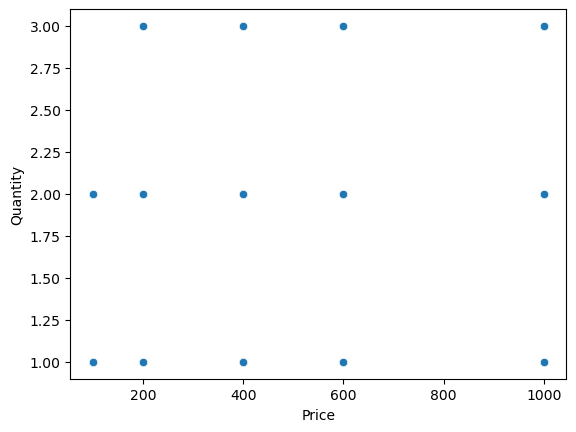

In [214]:
#what is the relationship between the total bill and tip
sns.scatterplot(data=df, x='Price', y='Quantity');

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='Date'>

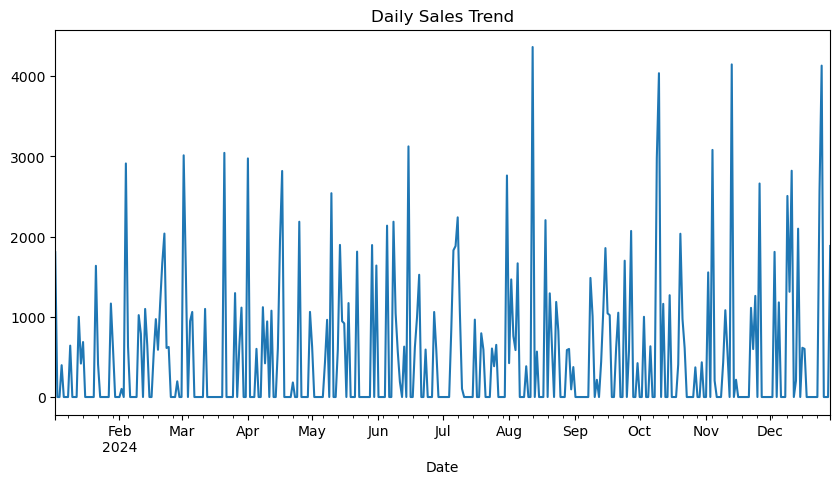

In [222]:
# Line Plot: Sales trend over time

# First, make sure there's a datetime column in your dataframe
# Assuming you have a 'Date' column that contains datetime values
# Convert it to datetime if it's not already
#df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
#df_indexed = df.set_index('Date')

# Now you can use resample
#df_indexed['Total'].resample('D').sum().plot(title='Daily Sales Trend', figsize=(10, 5))

# If you don't want to modify the original dataframe, you can do this in one line:
df.set_index(pd.to_datetime(df['Date']))['Total'].resample('D').sum().plot(title='Daily Sales Trend', figsize=(10, 5))

<Axes: title={'center': 'Top Customers by Revenue'}, xlabel='CustomerID'>

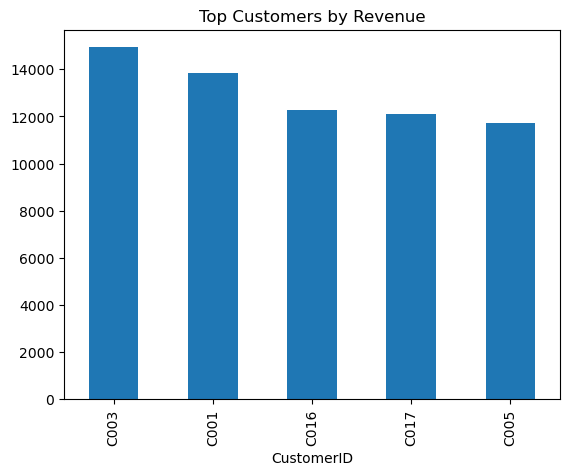

In [217]:
#Top-spending customers
df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(5).plot(kind='bar', title='Top Customers by Revenue')

<Axes: >

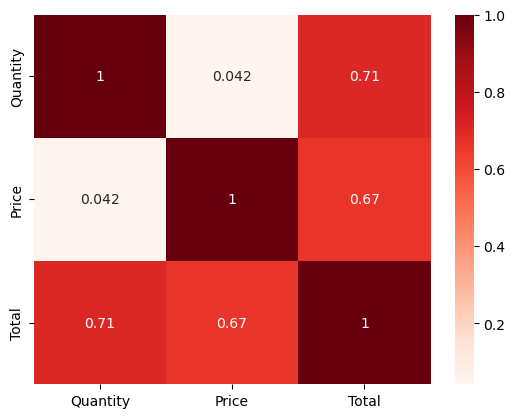

In [218]:
#Correlation matrix
sns.heatmap(df[['Quantity', 'Price', 'Total']].corr(), annot=True, cmap='Reds')

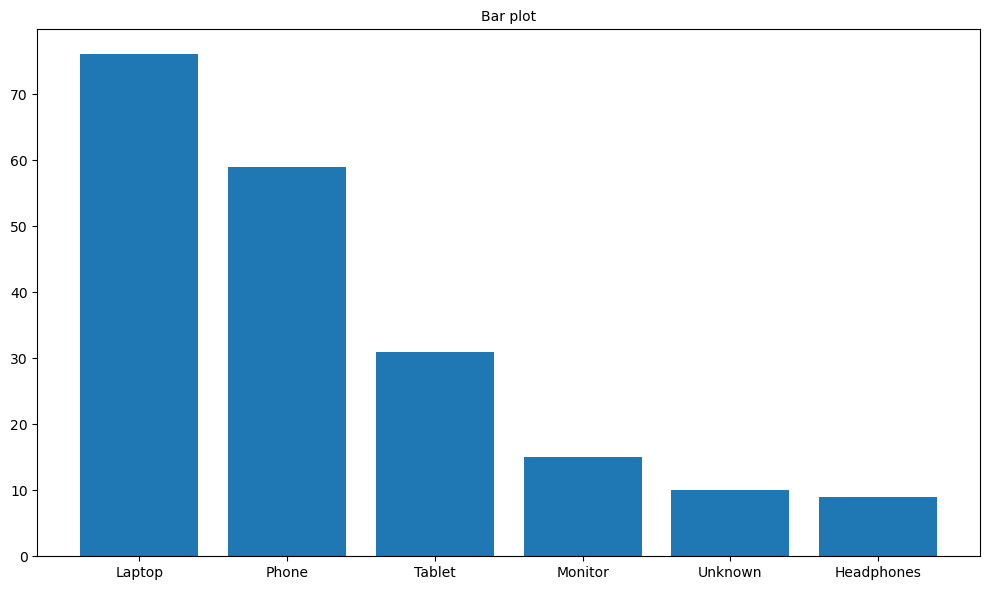

In [219]:
#Revenue share by product
#revenue_by_product.head(5).plot.pie(autopct='%1.1f%%', title='Top 5 Products by Revenue')

import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Creates 1 subplot

bar_data = df['Product'].value_counts()
axs.bar(bar_data.index, bar_data.values)  # Use axs instead of axs[0] for a single subplot
axs.set_title('Bar plot', fontsize=10)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the figure